# Libraries

In [2]:
# Libraries
## sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# Fundamentals

## Import Data
I am interested in learning patterns of stocks by analyzing and clustering fundamental indicators of stocks data in December 2016. According to dataset source in Kaggle:

`fundamentals.csv`: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

You can access all data from this [link](https://www.kaggle.com/code/uknowabhishek/nyse-fundamentals-analysis-and-k-means-clustering/notebook).

In [3]:
# read the data
df_fundamentals = pd.read_csv('fundamentals.csv')

In [4]:
# first few rows of the data
df_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
# number of columns and rows in the fundamentals data
length = df_fundamentals.shape

print(f"There are {length[0]} rows and {length[1]} columns in the fundamental indicators dataset")

There are 1781 rows and 79 columns in the fundamental indicators dataset


In [6]:
# information about data and its datatypes
df_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

There are 1781 rows and 79 columns in the dataset. I need to apply `Principal Component Analysis` (PCA) to reduce dimensionality of the data. Furthermore, there are `Uknown` and `Period Ending` columns which are going to be irrelevant for clustering, so I have to drop them. But before I drop `Period Ending` column, I need to use this column to filter data for only December 2016 fundamental metrics.

## Data Cleaning

In [7]:
# convert `Period Ending` column to datetime
df_fundamentals['Period Ending'] = pd.to_datetime(df_fundamentals['Period Ending'])

# filter fundamental metrics data to include stock indicators of December 2016
filtered_fundamentals = df_fundamentals[(df_fundamentals['Period Ending'].dt.year == 2016) & (df_fundamentals['Period Ending'].dt.month == 12)]

In [8]:
# check
filtered_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
27,27,ADBE,2016-12-02,8.660160e+08,-160416000.0,11978000.0,16.0,-203805000.0,4.616331e+09,169.0,...,5.839774e+09,2.811635e+09,7.424835e+09,5.282279e+09,1.270711e+10,5.854430e+09,-5.132472e+09,NaN,NaN,NaN
67,67,AIZ,2016-12-31,2.080962e+09,9275000.0,-23031000.0,14.0,-85233000.0,3.175867e+09,NaN,...,0.000000e+00,0.000000e+00,4.098100e+09,2.561103e+10,2.970913e+10,7.531780e+09,-4.470551e+09,NaN,NaN,NaN
71,71,AJG,2016-12-31,3.768200e+09,-240000000.0,0.0,12.0,-217800000.0,3.265500e+09,NaN,...,0.000000e+00,0.000000e+00,3.596600e+09,7.893000e+09,1.148960e+10,5.594800e+09,0.000000e+00,NaN,NaN,NaN
91,91,ALLE,2016-12-31,3.814000e+08,-19800000.0,-66200000.0,202.0,-42500000.0,0.000000e+00,73.0,...,8.293000e+08,4.296000e+08,1.133000e+08,2.134100e+09,2.247400e+09,2.238000e+09,0.000000e+00,NaN,NaN,NaN
95,95,ALXN,2016-12-31,5.720000e+08,-122000000.0,6000000.0,5.0,-333000000.0,7.957000e+09,157.0,...,2.578000e+09,8.230000e+08,8.694000e+09,4.559000e+09,1.325300e+10,3.084000e+09,-1.141000e+09,NaN,NaN,NaN


In [9]:
# check #2
filtered_fundamentals['Period Ending'].value_counts()

2016-12-31    97
2016-12-02     1
2016-12-30     1
Name: Period Ending, dtype: int64

In [10]:
# check 3
filtered_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 27 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Unnamed: 0                                           99 non-null     int64         
 1   Ticker Symbol                                        99 non-null     object        
 2   Period Ending                                        99 non-null     datetime64[ns]
 3   Accounts Payable                                     99 non-null     float64       
 4   Accounts Receivable                                  99 non-null     float64       
 5   Add'l income/expense items                           99 non-null     float64       
 6   After Tax ROE                                        99 non-null     float64       
 7   Capital Expenditures                                 99 non-null     float64       
 8  

In [11]:
# check 4
# we have 99 different stocks
filtered_fundamentals['Ticker Symbol'].value_counts()

ADBE     1
PG       1
PEP      1
PCG      1
OMC      1
        ..
DOV      1
DLPH     1
DISCK    1
DISCA    1
ZTS      1
Name: Ticker Symbol, Length: 99, dtype: int64

In [12]:
# drop uneccesary columns
## Unnamed column
filtered_fundamentals.drop(columns = ['Unnamed: 0', 'Period Ending'], axis = 1, inplace = True)

C:\Users\Beibarys Nyussupov\AppData\Local\Temp\ipykernel_29876\3553506990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fundamentals.drop(columns = ['Unnamed: 0', 'Period Ending'], axis = 1, inplace = True)


In [13]:
# check
# first few rows of the data
filtered_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 27 to 1780
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        99 non-null     object 
 1   Accounts Payable                                     99 non-null     float64
 2   Accounts Receivable                                  99 non-null     float64
 3   Add'l income/expense items                           99 non-null     float64
 4   After Tax ROE                                        99 non-null     float64
 5   Capital Expenditures                                 99 non-null     float64
 6   Capital Surplus                                      99 non-null     float64
 7   Cash Ratio                                           86 non-null     float64
 8   Cash and Cash Equivalents                            99 non-null     

There is also `Ticker Symbol` column that I need to manage in order to properly apply PCA as PCA should be used on numerical values.

Another important step is to remove null values in `CurrentRation` column, I am going to replace all null values with 0.

In [14]:
# make ticker symbols column as an index
filtered_fundamentals = filtered_fundamentals.set_index(['Ticker Symbol'])
# transform everything to numeric datatype
filtered_fundamentals = filtered_fundamentals.apply(pd.to_numeric, errors = 'coerce')
# fill null values with 0 in dataframe
filtered_fundamentals = filtered_fundamentals.fillna(0)

In [15]:
# check number of na rows
filtered_fundamentals.isnull().sum()
# there are no null values anymore

Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
After Tax ROE                   0
Capital Expenditures            0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 76, dtype: int64

In [16]:
# check datatypes
filtered_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, ADBE to ZTS
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Accounts Payable                                     99 non-null     float64
 1   Accounts Receivable                                  99 non-null     float64
 2   Add'l income/expense items                           99 non-null     float64
 3   After Tax ROE                                        99 non-null     float64
 4   Capital Expenditures                                 99 non-null     float64
 5   Capital Surplus                                      99 non-null     float64
 6   Cash Ratio                                           99 non-null     float64
 7   Cash and Cash Equivalents                            99 non-null     float64
 8   Changes in Inventories                               99 non-null     floa

In [17]:
# first few rows of the dataset
filtered_fundamentals.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,
ADBE,8.660160e+08,-160416000.0,11978000.0,16.0,-203805000.0,4.616331e+09,169.0,1.011315e+09,0.0,61000.0,...,5.839774e+09,2.811635e+09,7.424835e+09,5.282279e+09,1.270711e+10,5.854430e+09,-5.132472e+09,0.0,0.0,0.0
AIZ,2.080962e+09,9275000.0,-23031000.0,14.0,-85233000.0,3.175867e+09,0.0,1.031971e+09,4579000.0,1504000.0,...,0.000000e+00,0.000000e+00,4.098100e+09,2.561103e+10,2.970913e+10,7.531780e+09,-4.470551e+09,0.0,0.0,0.0
AJG,3.768200e+09,-240000000.0,0.0,12.0,-217800000.0,3.265500e+09,0.0,1.937600e+09,0.0,178300000.0,...,0.000000e+00,0.000000e+00,3.596600e+09,7.893000e+09,1.148960e+10,5.594800e+09,0.000000e+00,0.0,0.0,0.0
ALLE,3.814000e+08,-19800000.0,-66200000.0,202.0,-42500000.0,0.000000e+00,73.0,3.124000e+08,-15600000.0,1000000.0,...,8.293000e+08,4.296000e+08,1.133000e+08,2.134100e+09,2.247400e+09,2.238000e+09,0.000000e+00,0.0,0.0,0.0
ALXN,5.720000e+08,-122000000.0,6000000.0,5.0,-333000000.0,7.957000e+09,157.0,9.660000e+08,-84000000.0,0.0,...,2.578000e+09,8.230000e+08,8.694000e+09,4.559000e+09,1.325300e+10,3.084000e+09,-1.141000e+09,0.0,0.0,0.0


There are no null values in the data and all datatypes are numeric now. There are now 99 rows and 76 columns. I need to apply PCA and reduce dimensionality while capturing most of the variance in the data.

## Principal Component Analysis
Before I can apply PCA on my data, all numeric variables should be normalized for a proper analysis. That's why I am going to use a standard normalization, or z-statistic normalization for all my numeric variables.

In [18]:
# standard scaler
scaler = StandardScaler()

# object that will have standardized variables
fundamentals_norm = pd.DataFrame(scaler.fit_transform(filtered_fundamentals), columns = filtered_fundamentals.columns)

In [19]:
# summary to show if normalization worked
fundamentals_norm.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,...,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.0,99.0,99.0
mean,4.149318e-17,-2.242875e-18,1.233581e-17,-1.138960e-17,1.009294e-17,2.467162e-17,-7.534658e-19,-1.485905e-17,7.289343e-17,1.233581e-17,...,-5.607187e-18,2.635378e-17,-2.130731e-17,-2.467162e-17,9.083643e-17,2.859665e-17,-1.570012e-17,0.0,0.0,0.0
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,...,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,0.0,0.0,0.0
min,-5.572983e-01,-5.842321e+00,-2.389050e+00,-2.619738e-01,-4.123848e+00,-6.530631e-01,-5.538382e-01,-2.505287e-01,-3.093597e+00,-3.110193e-01,...,-5.846669e-01,-5.083298e-01,-1.874118e+00,-6.560521e-01,-7.478530e-01,-6.081754e-01,-3.459925e+00,0.0,0.0,0.0
25%,-4.633142e-01,-1.400747e-02,-2.121788e-01,-2.125131e-01,-1.538561e-01,-6.043762e-01,-4.250123e-01,-2.232486e-01,-9.878170e-02,-3.106388e-01,...,-4.594576e-01,-4.326361e-01,-6.051258e-01,-5.233013e-01,-5.808073e-01,-4.759785e-01,-1.142553e-01,0.0,0.0,0.0
50%,-3.337615e-01,2.268168e-01,-7.192636e-02,-1.855345e-01,3.911792e-01,-3.347610e-01,-2.878750e-01,-1.867831e-01,-1.734517e-02,-3.077844e-01,...,-3.788483e-01,-3.148813e-01,-3.589456e-01,-3.920960e-01,-3.715790e-01,-3.388296e-01,4.699595e-01,0.0,0.0,0.0
75%,-1.315102e-01,3.238790e-01,5.320550e-02,-1.293291e-01,5.880183e-01,1.498103e-01,7.366879e-02,-6.959544e-02,-1.734517e-02,-2.313821e-01,...,-4.058344e-02,-7.565692e-02,1.496974e-01,1.100645e-01,1.484804e-01,-6.665996e-02,5.857355e-01,0.0,0.0,0.0
max,5.510885e+00,1.970275e+00,6.380328e+00,9.283947e+00,6.862839e-01,4.369852e+00,7.956985e+00,9.662578e+00,8.083163e+00,5.546935e+00,...,6.000373e+00,5.819472e+00,4.549106e+00,4.466455e+00,4.060852e+00,4.432801e+00,5.857355e-01,0.0,0.0,0.0


In [20]:
# head() to show few rows of the normalized data
fundamentals_norm.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,-0.465085,0.030099,-0.032156,-0.194527,0.584432,-0.097529,0.850780,-0.193712,-0.017345,-0.311008,...,-0.230114,-0.311262,-0.237029,-0.547999,-0.529710,-0.469774,0.010501,0.0,0.0,0.0
1,-0.333761,0.340865,-0.158134,-0.203520,0.643688,-0.270876,-0.553838,-0.192524,-0.007467,-0.310733,...,-0.584667,-0.508330,-0.507809,-0.076495,-0.190354,-0.423830,0.084687,0.0,0.0,0.0
2,-0.151388,-0.115648,-0.075259,-0.212513,0.577438,-0.260089,-0.553838,-0.140442,-0.017345,-0.277090,...,-0.584667,-0.508330,-0.548629,-0.487446,-0.554011,-0.476885,0.585735,0.0,0.0,0.0
3,-0.517467,0.287618,-0.313475,0.641809,0.665044,-0.653063,0.052890,-0.233907,-0.050998,-0.310829,...,-0.534317,-0.478219,-0.832153,-0.621018,-0.738483,-0.568831,0.585735,0.0,0.0,0.0
4,-0.496865,0.100453,-0.053668,-0.243988,0.519866,0.304491,0.751044,-0.196318,-0.198555,-0.311019,...,-0.428148,-0.450646,-0.133725,-0.564775,-0.518814,-0.545658,0.457855,0.0,0.0,0.0


As all of the variables in the data normalized, I need to choose number of components (variables) that I will include in the data. In order to do it, I will compare number of components vs Cumulative Explained Variance and I will choose optimal number that has the most of data variance saved.

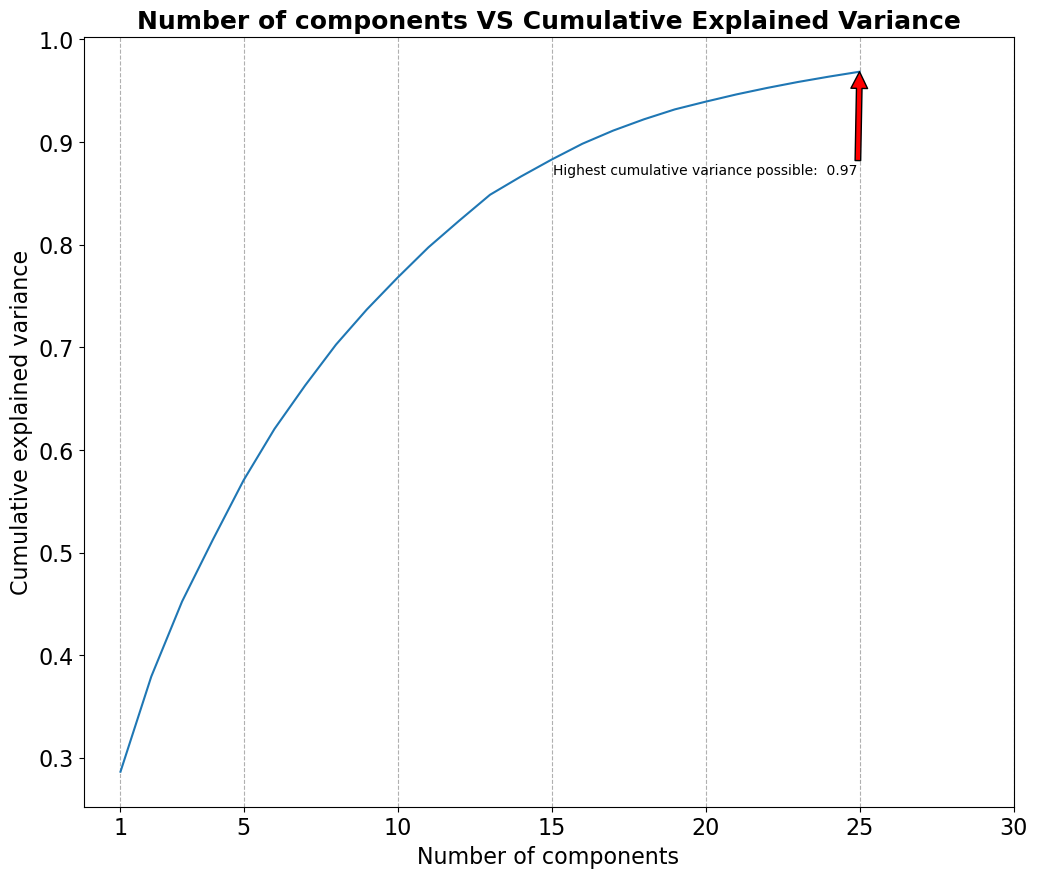

,Number of Components,Cumulative Variance for Component
0,1,0.286495
1,2,0.379206
2,3,0.452330
3,4,0.512570
4,5,0.570557
5,6,0.620420
6,7,0.662947
7,8,0.702642
8,9,0.736831
9,10,0.767886


In [21]:
# model with a specific number of components for PCA
## n_components = number of components
model_pca = PCA(n_components=25)

# fit the dataa to the pca model
model_pca.fit_transform(fundamentals_norm)

cumulative_variance = model_pca.explained_variance_ratio_.cumsum()
highest_cumulative_variance = cumulative_variance[-1]
n_components = len(cumulative_variance)


# plot
plt.figure(figsize = (12, 10))
plt.plot(range(1, n_components + 1), cumulative_variance)

## parameters
### title
plt.title('Number of components VS Cumulative Explained Variance', fontweight = 'bold', fontsize = 18)

### xlabels
plt.xlabel('Number of components', fontsize = 16)
plt.xticks([1, 5, 10, 15, 20, 25, 30], fontsize = 16)

### ylabels
plt.ylabel('Cumulative explained variance', fontsize = 16 )
plt.yticks(fontsize = 16)


### vertical lines from grids to determine number of components with the highest explained variation
plt.grid(True,
         which = 'major',
         linestyle = '--',
        axis = 'x')

### annotation to find higest variance possible and corresponding number of components
plt.annotate(f"Highest cumulative variance possible: {highest_cumulative_variance: .2f}",
             xy = (n_components, highest_cumulative_variance),
             xytext = (n_components - 5, highest_cumulative_variance - 0.1),
             arrowprops = dict(facecolor = 'red'),
             horizontalalignment = 'center')
plt.show()


### dataframe for more clear understanding
all_components = np.arange(1, n_components + 1)

pd.DataFrame({
    'Number of Components' : all_components,
    'Cumulative Variance for Component': cumulative_variance
})

At most, I can save ~97% of data variance using 25 components. Let's start from 16 components with 91% of captured variance and increase number of components further if the clustering won't be clear and accurate. 

## Determining Number of K clusters for K-means clustering
As I identified optimal number of components, I am going to use this reduced data to find an optiminal number of clusters and then produce a K-means clustering.

In [97]:
# fit main data to pca with 16 components
pca = PCA(n_components = 16)
data = pca.fit_transform(fundamentals_norm)

In [98]:
## sse - SUM OF SQUARED ERRORS
## record sss for each number of clusters
sse = []
for k in range(1, 25):
  print(k)
  kmeans =  KMeans(n_clusters = k, random_state = 1042)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

In [99]:
## check
sse

[6491.850585196974,
 4983.8930596616865,
 4303.2991527966915,
 4018.139023968166,
 3773.4306146209256,
 3455.255774492848,
 3277.1588433338798,
 2881.0561275407063,
 2641.829921740653,
 2465.2910034675374,
 2144.457051909882,
 1910.9531228305502,
 1731.9328015334977,
 1549.0201943263655,
 1325.5581059708275,
 1226.032484055075,
 1034.9075127502701,
 913.1410831406881,
 806.4345886194559,
 782.0457755257429,
 733.3962679371039,
 663.7826447682758,
 617.8866663607903,
 560.6076170312718]

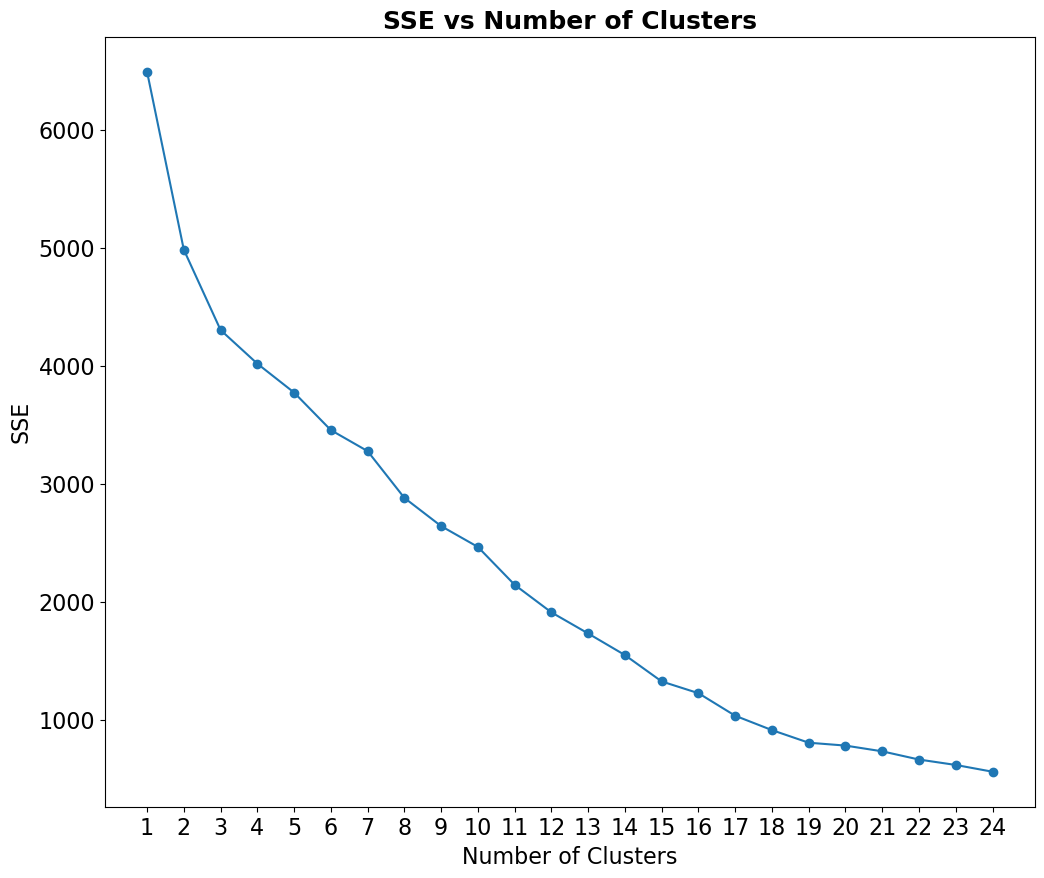

In [100]:
# plot SSE vs number of clusters
plt.figure(figsize = (12, 10))
plt.plot(range(1, 25), sse, marker='o')

## parameters
### title
plt.title('SSE vs Number of Clusters', fontweight = 'bold', fontsize = 18)

### xlabels
plt.xlabel("Number of Clusters", fontsize = 16)
plt.xticks(range(1, 25), fontsize = 16)

### ylabels
plt.ylabel("SSE", fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

Above visualization shows that SSE highly decreases till ~3 clusters, then it marginally decreases, as clusters increase. Marginall decrease is not something I am looking for as I am intending to cluster datapoints into distinct groups. That's why I will choose 3 clusters.

## Clustering

In [101]:
# clustering model
model_clusters = KMeans(n_clusters = 3, random_state = 1042)

# cluster labels with reduced data
cluster_labels = model_clusters.fit_predict(data)


# cluster classes for observations
print(cluster_labels[0:10])

[0 0 0 0 0 1 1 0 0 1]


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

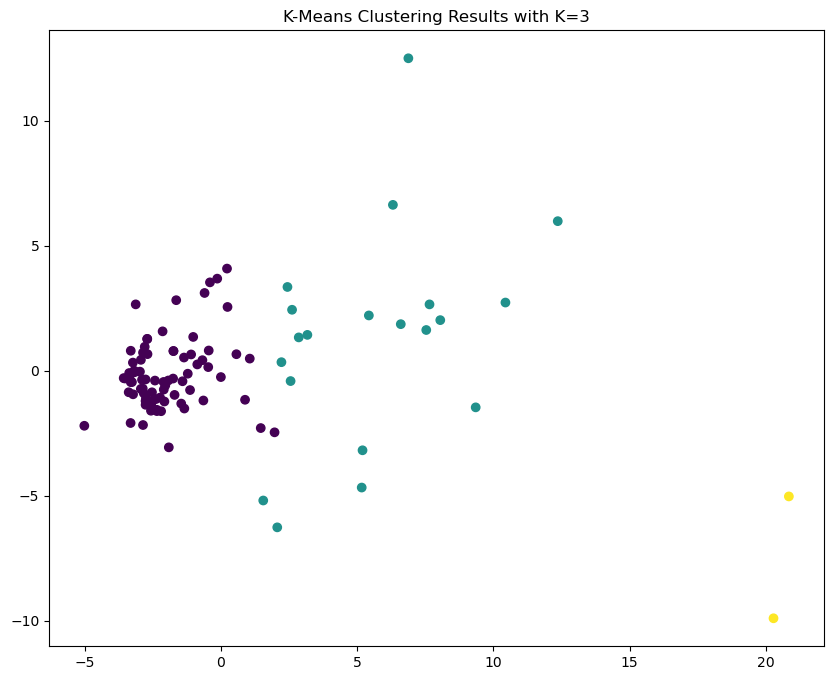

In [102]:
# initial plot without centroids
ig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.scatter(data[:,0], data[:,1], c=cluster_labels)
ax.set_title("K-Means Clustering Results with K=3")

With 16 components and 3 clusters, it is clear that some green and purple groups are overlapping. I want to try and to cluster groups in a better and more distinct clusters.

I assume that such overlapping might be related to noise and to a number of components, as I only saved 91% of explained data variance. Now I will use 18 components with 3 clusters with 93% of explained data variance to see if it is going to improve the clustering process.

In [103]:
# fit main data to pca with 18 components
pca = PCA(n_components = 18)
data = pca.fit_transform(fundamentals_norm)

In [104]:
# clustering model
model_clusters = KMeans(n_clusters = 3, random_state = 1042)

# cluster labels with reduced data
cluster_labels = model_clusters.fit_predict(data)


# cluster classes for observations
print(cluster_labels[0:10])

[0 0 0 0 0 1 1 0 0 1]


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

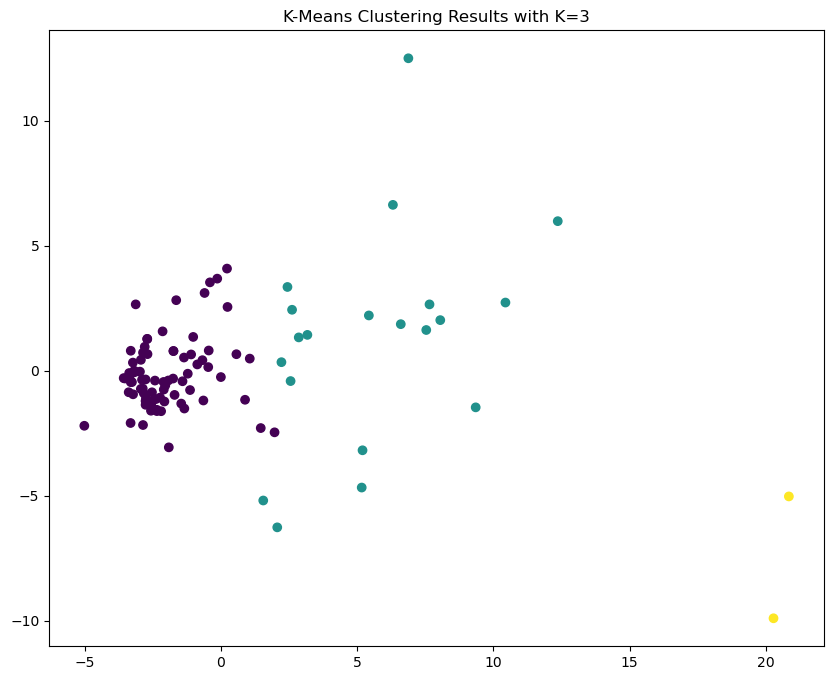

In [105]:
# initial plot without centroids
ig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.scatter(data[:,0], data[:,1], c=cluster_labels)
ax.set_title("K-Means Clustering Results with K=3")

K-Means Clustering with 18 components and 3 clusters has still overlaps and I don't see any change. It might be due to the noise in the data. What if I decrease number of components to 14 with 86% of captured data variance.

In [118]:
# fit main data to pca with 14 components
pca = PCA(n_components = 14)
data = pca.fit_transform(fundamentals_norm)

In [119]:
# clustering model
model_clusters = KMeans(n_clusters = 3, random_state = 1042)

# cluster labels with reduced data
cluster_labels = model_clusters.fit_predict(data)


# cluster classes for observations
print(cluster_labels[0:10])

[0 0 0 0 0 1 1 0 0 1]


C:\Users\Beibarys Nyussupov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

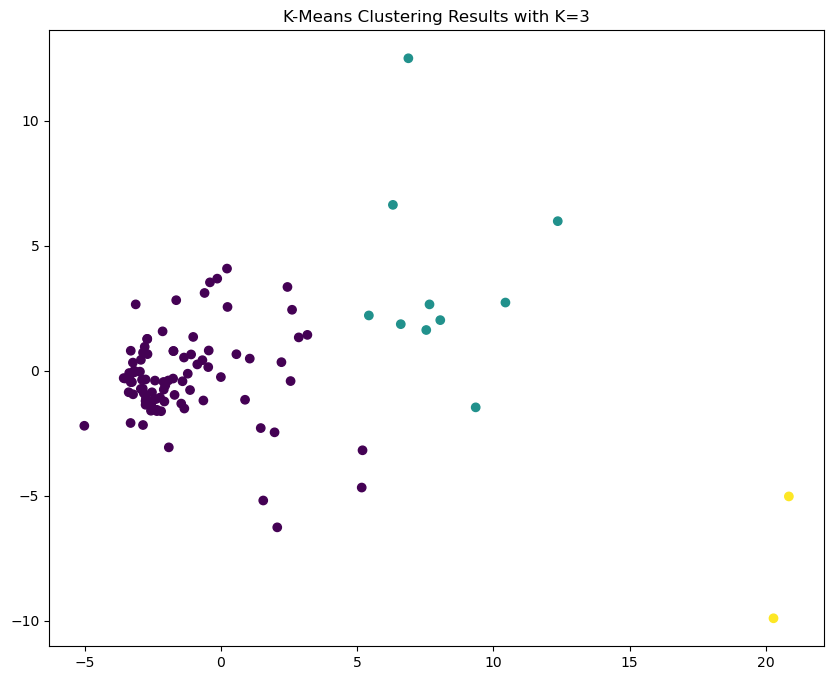

In [120]:
# initial plot without centroids
ig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.scatter(data[:,0], data[:,1], c=cluster_labels)
ax.set_title("K-Means Clustering Results with K=3")

Now it can be seen that with 14 components and 86% of captured data variance, there are 3 distinct groups: 

    1) Purple
    
    2) Green 
    
    3) Yellow

The last step will be to generate center clusters for each group. 

### Generate Clusters for each cluster group

In [122]:
# data with our clusters
data

# define clusters in the data
centroids = model_clusters.cluster_centers_


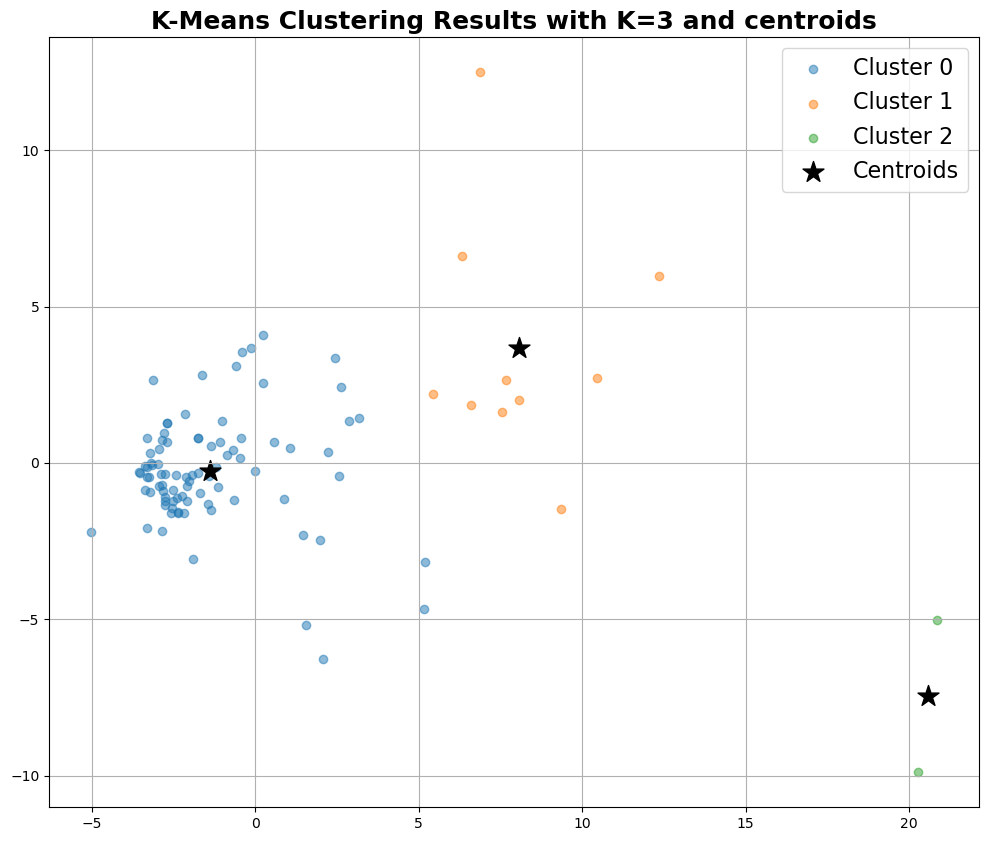

In [123]:
# data with each cluster as unique value
each_cluster = np.unique(cluster_labels)

# figure size
plt.figure(figsize = (12, 10))

for cluster in each_cluster:
    # Filter by each cluster
    cluster_data = data[cluster_labels == cluster]

    # Plot the data points
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}", alpha=0.5)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='black', label='Centroids')

# parameters
## title
plt.title('K-Means Clustering Results with K=3 and centroids', fontweight = 'bold', fontsize = 18)

## legend
plt.legend(fontsize = 16)

## grid
plt.grid(True)

# show the plot
plt.show()


Or I could create a 3d plot to look on cluster groups better if needed. 

In [129]:
# library for 3d graph 
import plotly.express as px

# plot
fig = px.scatter_3d(x=data[:,0], y=data[:,1], z=data[:,2], color=cluster_labels)
fig.update_traces(marker=dict(size=5))
fig.update_layout(title="3D K-Means Clustering Results with K=3")
fig.show()